# Predicting heart disease using ML

This notebook looks into various Python-based machine learing and data science library in an attempt to build a machine learning model capable of predicting wheather or not someone has heart disease based on their medical attributes.

We're going to take the following apporoch:
1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Defination

In a statement,
> Given clinical parameters about a patient, can we predict wheather or not they have heart disease?

## 2.Data

The Original Data came from Cleaveland data from the UCI ML repo.:
    https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle:
    https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
    
## 3. Evaluation

> Reaching `95%` accuaray at predicting wheather or not a patient has heart diesease during the proof of concept.

## 4. Features

This is where you'll get different information about each of the features in your data.

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems 
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use pandas, matplotlib and Numpy for data analysis and manipulation.

In [1]:
# Import all the tools we need

# Regular EDA (Exploratory data analysis) and ploting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab
from ydata_profiling import ProfileReport
from highlight_text import fig_text

# We want our plots to apear inside the notebook
%matplotlib inline 

In [2]:
df = pd.read_csv("heart.csv")
print("=x"*40)
print("\n\n\n")
print(f"Heart Disease Data :\n\t\t{df.shape[0]} Number of Rows \n\t\t&\n\t\t{df.shape[1]} Number of Columns")
print("\n\n\n")
print("=x"*40)
# df.shape -> (rows, columns)

=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x




Heart Disease Data :
		1025 Number of Rows 
		&
		14 Number of Columns




=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x


## Data Exploration (Exploratory Data analysis or EDA)

The goal here is to find more about the data and become a subject matter export on dataset you're working with.
1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df["target"].value_counts()[1]

526

### In Data set in total `526` are the patients with heart disease and `499` are patients with no heart disease.

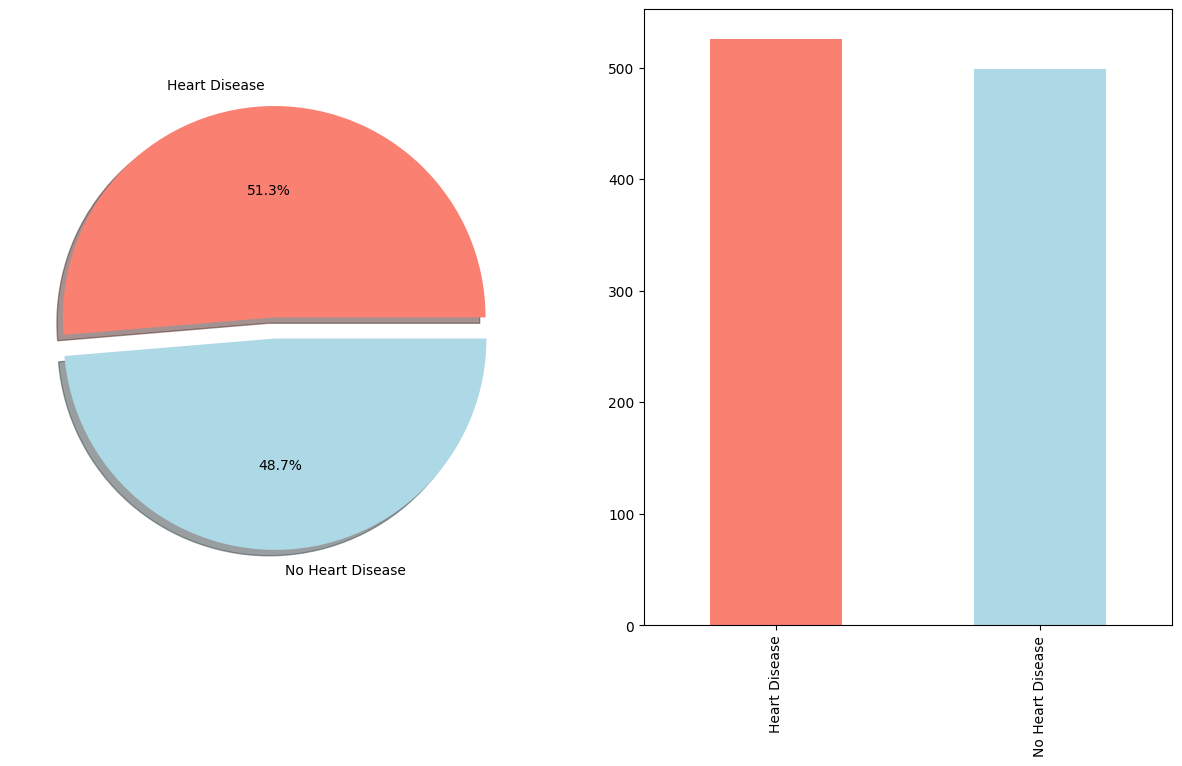

In [5]:
# Visualizing the Target
f,ax=plt.subplots(1,2,figsize=(15,8))
df["target"].replace({0:"No Heart Disease",1:"Heart Disease"}).value_counts().plot(kind="pie",colors=["salmon","lightblue"],ax=ax[0],explode=[0,0.1],autopct='%1.1f%%',shadow=True)
ax[0].set_ylabel('')
df["target"].replace({0:"No Heart Disease",1:"Heart Disease"}).value_counts().plot(kind="bar", ax = ax[1],color=["salmon","lightblue"])
ax[1].set_ylabel('')
ax[1].set_xlabel('')
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

From above info about the data we understand that there are no missing values in data set, so no filling data step required.<br> 
And,<br>
All columns has datatype of int and float so no conversion is needed

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Dataset Report 
ProfileReport(df, title='Heart Disease Dataset Report', minimal=True, progress_bar=False, samples=None, correlations=None, interactions=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '600px'}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

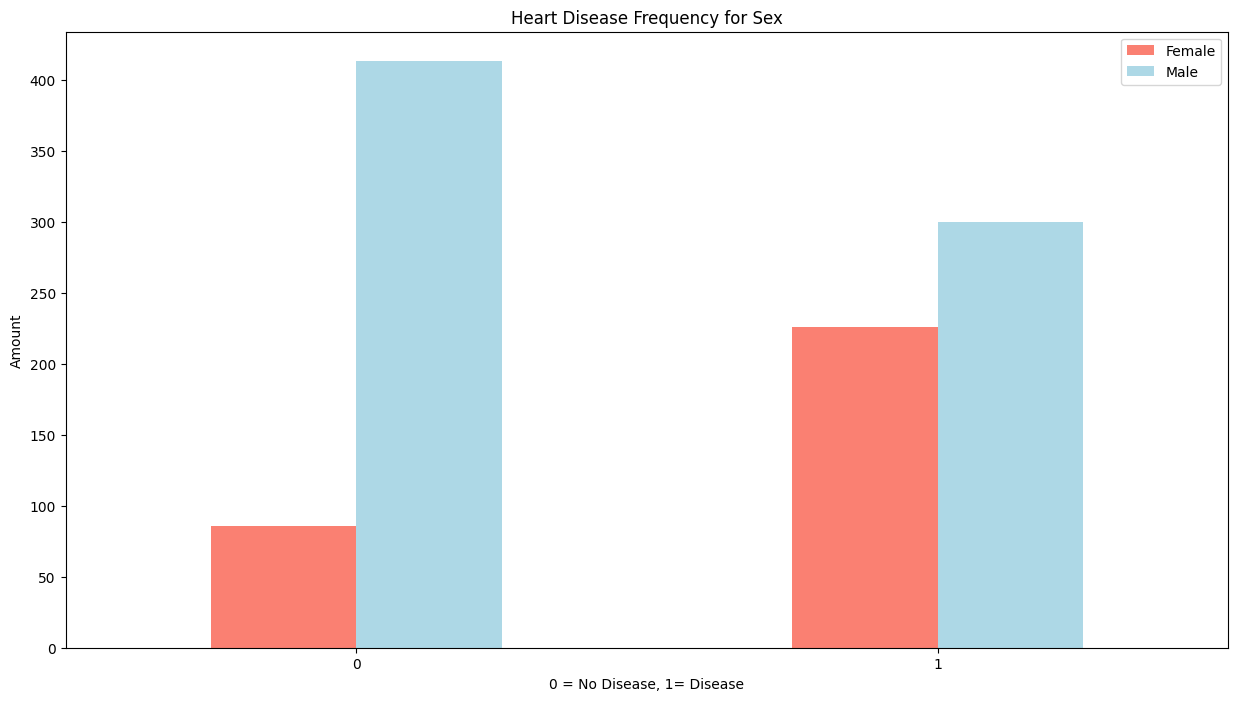

In [10]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                  figsize=(15,8),
                                  color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)
plt.show()

### Age vs Max Heart Rate for heart Disease

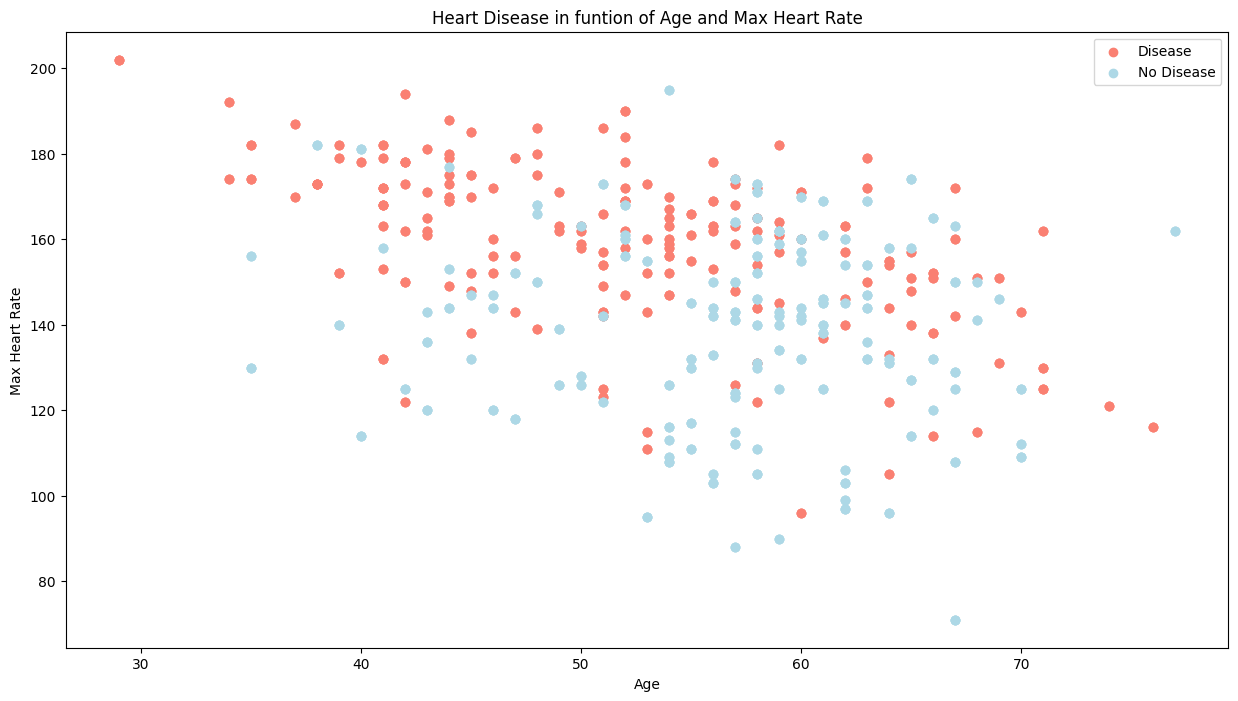

In [11]:
# Create another figure
plt.figure(figsize=(15,8))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color="lightblue");

# Add some helpful info
plt.title("Heart Disease in funtion of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])
plt.show()

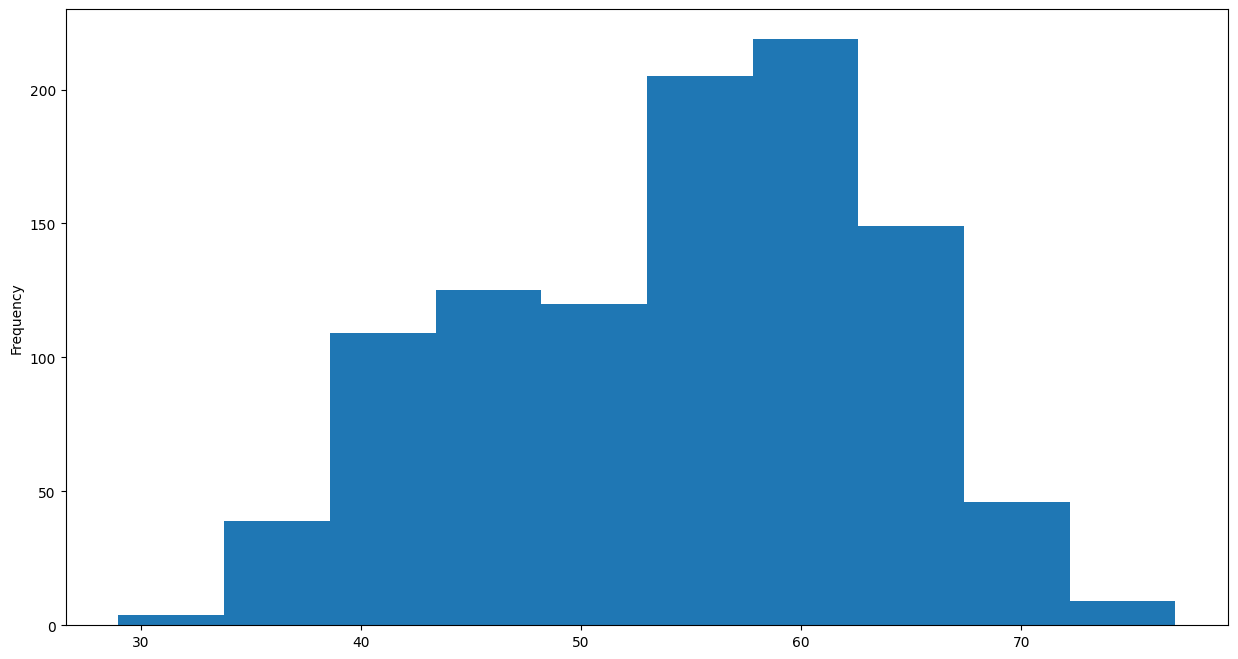

In [12]:
# Check the distribution of the age column with a histogram
df.age.plot.hist(figsize=(15,8));

## Heart Disease Frequency per Chest Pain Type
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

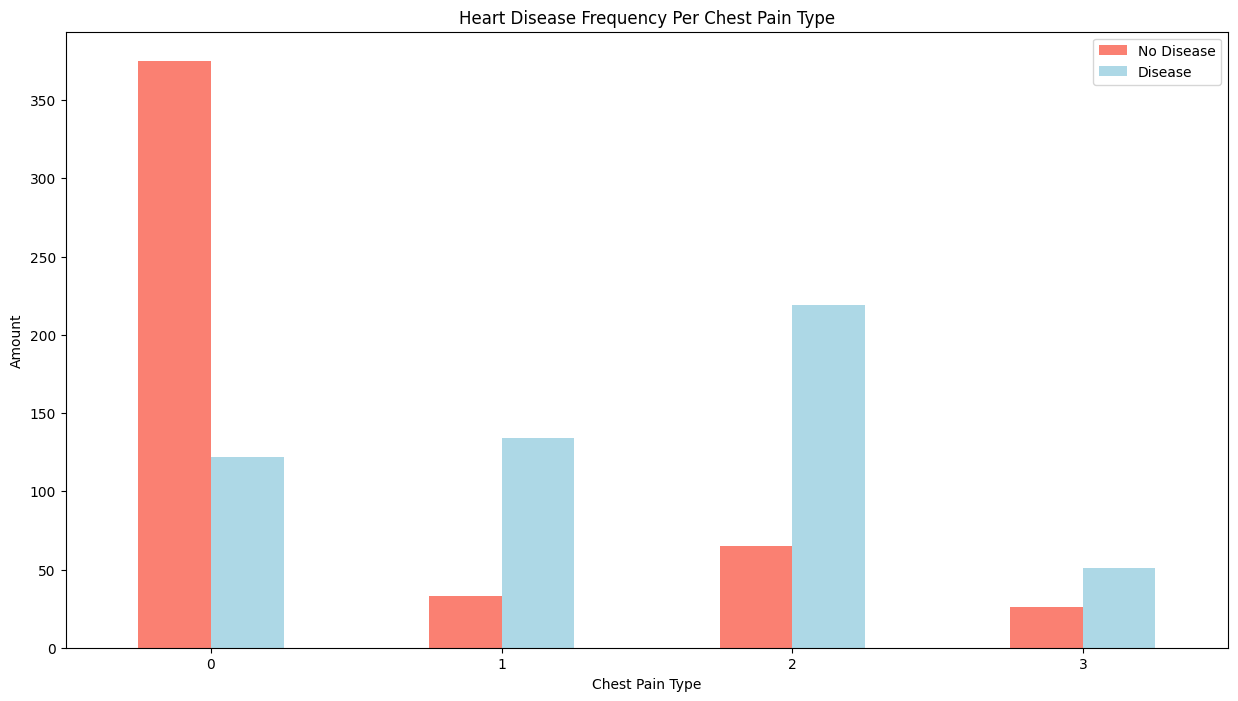

In [13]:
# Make the crosstab more visual 
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize = (15,8),
                                 color=["salmon","lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

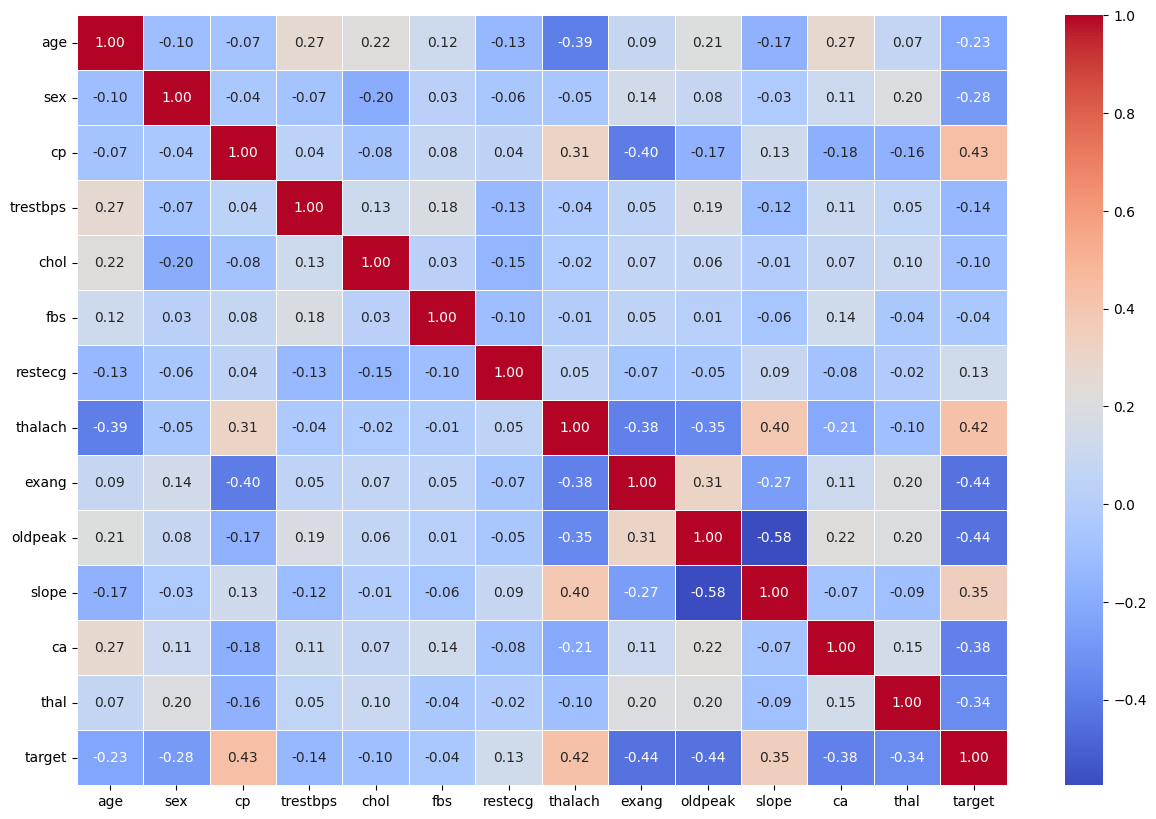

In [22]:
# Let's Make our correlation matrix a little prettier
corr_matrix = df.corr()
fg,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths=0.5,
                fmt=".2f",
                cmap="coolwarm")
plt.yticks(rotation=0);

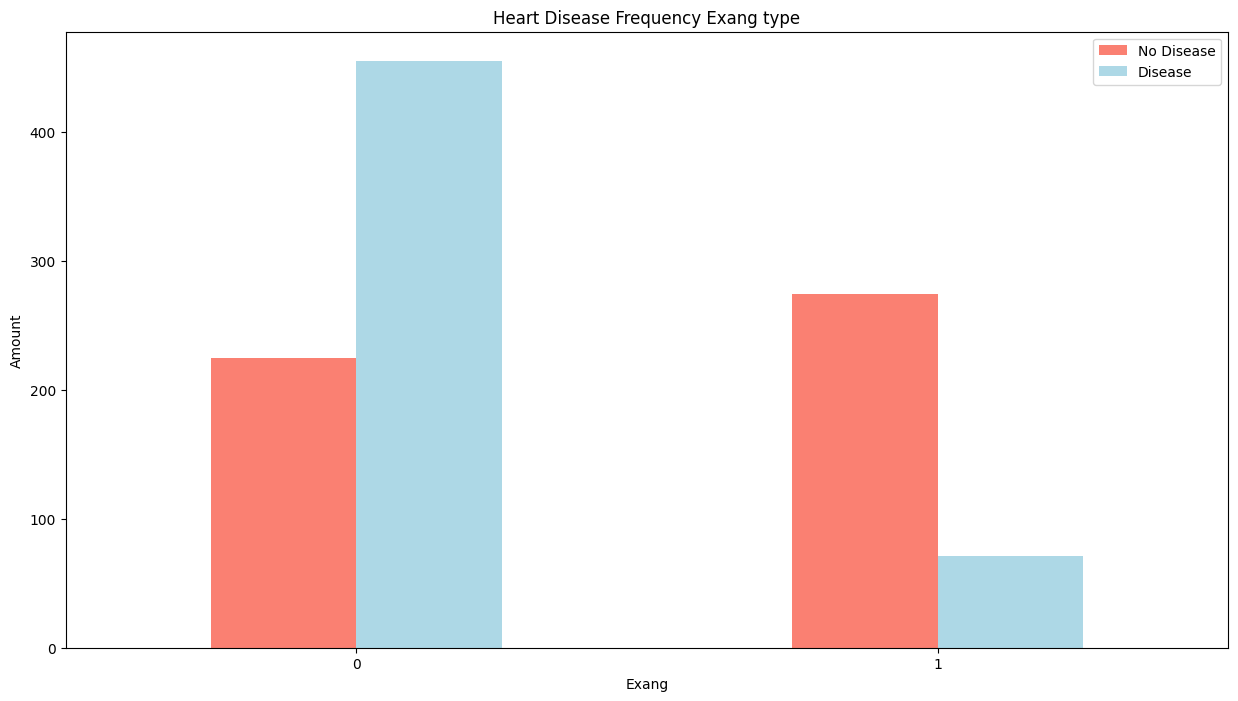

In [15]:
# Make crosstab visulization
pd.crosstab(df.exang,df.target).plot(kind="bar",
                                    figsize=(15,8),
                                    color=["salmon","lightblue"]);
# Add some communication
plt.title("Heart Disease Frequency Exang type")
plt.xlabel("Exang")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

## Checking if data is Gaussian Distributed:
    

In [16]:
def plot_data(df,feature):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

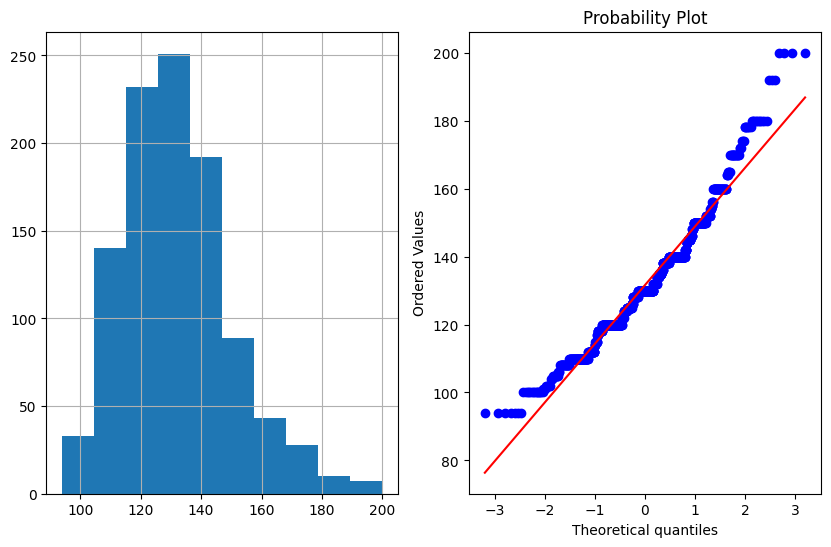

After Logirthimic Transformation


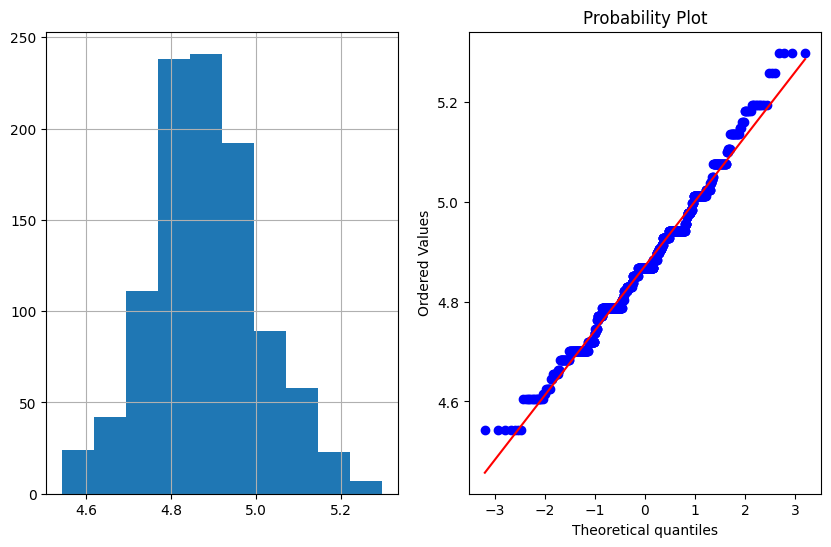

In [17]:
plot_data(df,"trestbps")
df["trestbps"]=np.log(df["trestbps"])
print("After Logirthimic Transformation")
plot_data(df,"trestbps")

## Pair Plot
5. Below is multiple pairwise bivariate distributions in a dataset. 

The diagonal plots are the univariate plots, and this displays the relationship for the (n, 2) combination of variables in a DataFrame as a matrix of plots.

In [18]:
# sns.pairplot(df, hue = 'target', palette={0: 'blue', 1: 'red'})

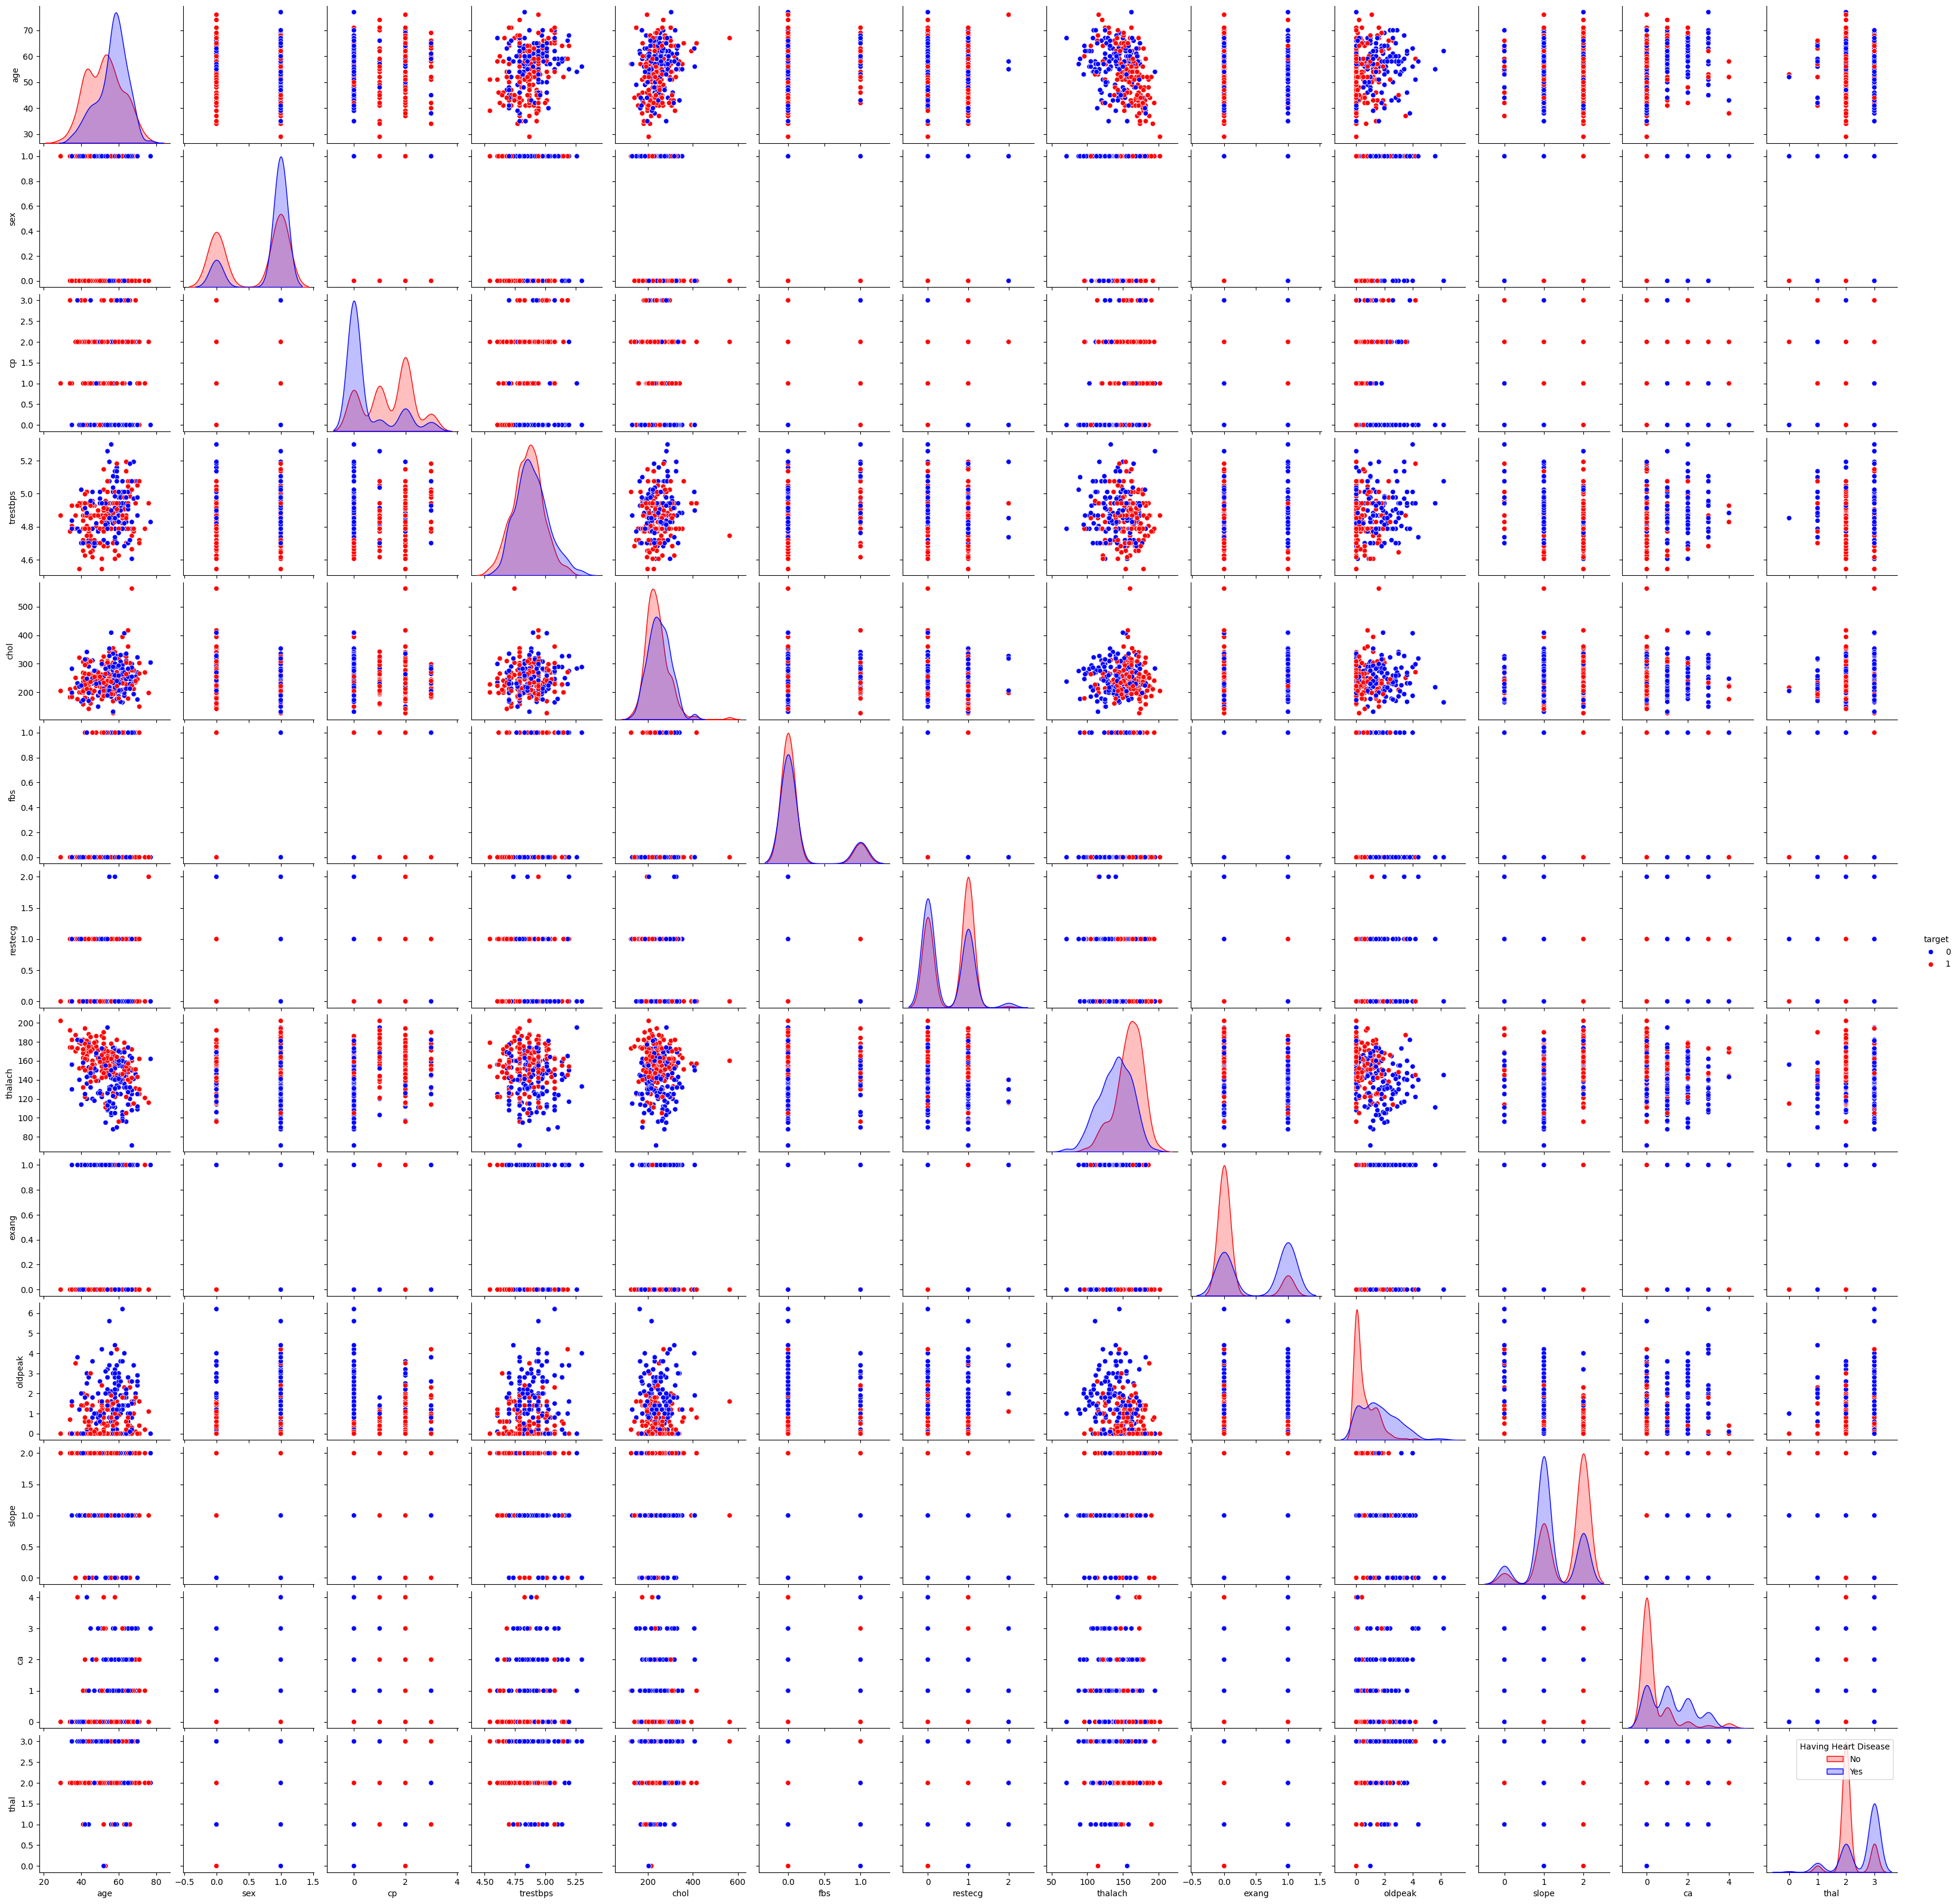

In [19]:
sns.pairplot(df, hue='target', palette={0: 'blue', 1: 'red'})
plt.legend(title="Having Heart Disease", labels=["No", "Yes"])
plt.show()